In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/datasets/dataset_small.csv')
# data=data.drop(['URL','FILENAME','TLD','Title','Domain'],axis=1)
print(data.head())

# x=np.array(data.drop(['status'],axis=1))
# y=data['status']
# y=[1 if y[i]=='legitimate' else -1 for i in range(len(y))]
# y=np.array(y)
# print(len(x[y==1]),len(x[y==-1]))
# train_x=x[y==1][1000:]
# train_x=np.append(train_x,x[y==-1][1000:],axis=0)
# train_y=x[y==0][1000:]


   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            2               0                  0              0   
1            4               0                  0              2   
2            1               0                  0              1   
3            2               0                  0              3   
4            1               1                  0              4   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                4   
1                    0      

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('phishing', axis=1), data['phishing'], test_size=0.5, random_state=42, stratify=data['phishing'])


In [3]:
print("Train set shape:", X_train.shape, X_test.shape)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=np.array([1 if y_train[i]==1 else -1 for i in range(len(y_train))])
y_test=np.array([1 if y_test[i]==1 else -1 for i in range(len(y_test))])
X_train=np.array(X_train)
X_test=np.array(X_test)
print("Test set shape:",y_train.shape, y_test.shape)
print("Train set shape:", X_train.shape, X_test.shape)

x_train_t=X_train.T

Train set shape: (29322, 111) (29323, 111)
Test set shape: (29322,) (29323,)
Train set shape: (29322, 111) (29323, 111)


In [37]:
print(x_train_t.shape)
midpts=[]
classifies=[[],[],[],[],[]]
for i in range(X_train.shape[1]):
  values=sorted(list(set(x_train_t[i])))
  # print(values[0],values[10000])
  mdpt=[]
  for j in range(len(values)-1):
    mdpt.append((values[j]+values[j+1])/2)
  print(len(mdpt))
  midpts.append(mdpt)

(111, 29322)
20
27
17
21
5
16
11
17
8
5
5
6
8
12
4
6
41
6
393
17
10
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
34
87
1
1
13
23
16
17
1
6
9
9
5
5
6
3
7
10
1
7
32
194
6
19
16
1
1
4
2
4
3
3
4
4
5
5
1
1
27
136
16
23
16
13
6
17
4
16
5
2
2
7
6
2
1
3
29
303
2
16
1
26550
2
1949
6468
1906
13
15
14
6020
1
13
2
1
1


In [38]:
print(len([len(i) for i in midpts if len(i)>=5000]))

3


In [39]:
classifies=[]
for i in range(len(x_train_t)):
  values=sorted([(X_train[j][i],j) for j in range(len(y_train))], key=lambda x: x[0])
  a=0
  b=0
  classify={1:[],-1:[]}
  classifies1=[]
  while(a<len(values) and b<len(midpts[i])):
    if values[a][0]<midpts[i][b]:
      classify[y_train[values[a][1]]].append(values[a][1])
      a+=1
    else:
      classify[1]=np.array(classify[1])
      classify[-1]=np.array(classify[-1])


      classifies1.append(classify)
      classify={1:[j for j in classify[1]],-1:[j for j in classify[-1]]}
      b+=1
  while(b<len(midpts[i])):
    classify[1]=np.array(classify[1])
    classify[-1]=np.array(classify[-1])

    classifies1.append(classify)
    b+=1
  classifies2=[]
  a=len(values)-1
  b=len(midpts[i])-1
  classify={1:[],-1:[]}
  while(a>=0 and b>=0):
    if values[a][0]>=midpts[i][b]:
      classify[y_train[values[a][1]]].append(values[a][1])
      a-=1
    else:
      classify[1]=np.array(classify[1])
      classify[-1]=np.array(classify[-1])

      classifies2.append(classify)
      classify={1:[j for j in classify[1]],-1:[j for j in classify[-1]]}
      b-=1
  while(b>=0):
    classify[1]=np.array(classify[1])
    classify[-1]=np.array(classify[-1])

    classifies2.append(np.array(classify))
    b-=1
  classifies2=classifies2[::-1]
  classifies.append([(classifies1[j],classifies2[j]) for j in range(len(classifies1))])






In [40]:
w=[1/len(y_train),]*len(y_train)
w=np.array(w)
# print(classifies[0][0],classifies[0][5000])
print(X_train.shape)
def boost(yT,w,splits,midpts,lab):
  # print(set(w))
  min_l=[np.inf,0,0,0,0]
  for i in range(yT.shape[1]):
    for j in range(len(midpts[i])):
      # print(len(classifies[i]),i)
      classify=classifies[i][j]

      p=1 if len(classify[0][1])>len(classify[0][-1]) else -1
      q=1 if len(classify[1][1])>len(classify[1][-1]) else -1
      # print(w.shape,classify[1][(-1)*q])
      miss= 0 if len(classify[1][(-1)*q])==0  else np.sum(w[classify[1][(-1)*q]])
      miss+=0 if len(classify[0][(-1)*p])==0  else np.sum(w[classify[0][(-1)*p]])
      l=miss/np.sum(w)
      # print(l)
      if l<min_l[0]:
        min_l=[l,i,midpts[i][j],p,q]
  alpha=(1-min_l[0])/min_l[0]

  # print(alpha)
  dim,cut,p,q=min_l[1:]
  cnt=0

  for i in range(len(lab)):
    # print(len(lab),dim,i,yT.shape)
    if (yT[i][dim]>=cut  and lab[i]!=q) or (yT[i][dim]<cut  and lab[i]!=p):
      cnt+=1
      w[i] = w[i]*alpha
  # print(cnt,len(w),set(w))
  min_l.append(alpha)
  splits.append(min_l[1:])
splits=[]
for i in range(300):
  # print(i)
  # print(set(w))
  boost(X_train,w,splits,midpts,y_train)
  print(splits[-1])


print(splits)







(29322, 111)
[57, 1.5, -1, 1, 5.107477608831493]
[100, 3616.5, 1, -1, 2.469347269545681]
[19, 1.5, 1, -1, 2.185218365602682]
[18, 25.5, -1, 1, 1.7968980813745936]
[105, 3601.5, -1, 1, 1.6722996553989182]
[100, 1160.0, 1, -1, 1.557506562747331]
[97, 0.253562, -1, 1, 1.4479590983772819]
[3, 3.5, -1, 1, 1.5085114029656734]
[3, 0.5, -1, 1, 1.5148386799191536]
[93, 13.5, -1, 1, 1.3666945394012264]
[100, 6683.5, 1, -1, 1.402050831534752]
[17, 1.5, -1, 1, 1.3254749494563844]
[103, 2.5, 1, -1, 1.282653083577215]
[37, 17.5, -1, 1, 1.221587824162672]
[99, 53827.5, 1, -1, 1.2308844695723036]
[19, 1.5, 1, -1, 1.22887868520358]
[100, 408.5, 1, -1, 1.2258304789047185]
[99, 16951.5, -1, 1, 1.1938298882745364]
[93, 17.5, -1, 1, 1.154886359032484]
[41, 4.5, 1, -1, 1.242228239319141]
[17, 1.5, -1, 1, 1.202866521917409]
[97, 0.0396585, -1, 1, 1.2195260846123377]
[93, 22.5, -1, 1, 1.1767040921702139]
[99, 53827.5, 1, -1, 1.1851254551939727]
[107, 0.5, 1, -1, 1.1339514424386443]
[18, 127.5, -1, 1, 1.191624

In [43]:
indcs=np.random.choice(len(y_test), 6000, replace=False)
X_test=X_test[indcs]
y_test=y_test[indcs]
print(y_test.shape)

(6000,)


In [41]:
print(y_test.shape)

(29323,)


In [4]:
splits=[[57, 1.5, -1, 1, 5.107477608831493], [100, 3616.5, 1, -1, 2.469347269545681], [19, 1.5, 1, -1, 2.185218365602682], [18, 25.5, -1, 1, 1.7968980813745936], [105, 3601.5, -1, 1, 1.6722996553989182], [100, 1160.0, 1, -1, 1.557506562747331], [97, 0.253562, -1, 1, 1.4479590983772819], [3, 3.5, -1, 1, 1.5085114029656734], [3, 0.5, -1, 1, 1.5148386799191536], [93, 13.5, -1, 1, 1.3666945394012264], [100, 6683.5, 1, -1, 1.402050831534752], [17, 1.5, -1, 1, 1.3254749494563844], [103, 2.5, 1, -1, 1.282653083577215], [37, 17.5, -1, 1, 1.221587824162672], [99, 53827.5, 1, -1, 1.2308844695723036], [19, 1.5, 1, -1, 1.22887868520358], [100, 408.5, 1, -1, 1.2258304789047185], [99, 16951.5, -1, 1, 1.1938298882745364], [93, 17.5, -1, 1, 1.154886359032484], [41, 4.5, 1, -1, 1.242228239319141], [17, 1.5, -1, 1, 1.202866521917409], [97, 0.0396585, -1, 1, 1.2195260846123377], [93, 22.5, -1, 1, 1.1767040921702139], [99, 53827.5, 1, -1, 1.1851254551939727], [107, 0.5, 1, -1, 1.1339514424386443], [18, 127.5, -1, 1, 1.1916241139774502], [51, -0.5, -1, 1, 1.1711367869760472], [17, 1.5, -1, 1, 1.114779700389757], [100, 6809.5, 1, -1, 1.1741179876574015], [3, 5.5, -1, 1, 1.1422439569789926], [41, 4.5, 1, -1, 1.1487479806094625], [18, 127.5, -1, 1, 1.142715104945011], [99, 3215.5, -1, 1, 1.1304761477054635], [17, 1.5, -1, 1, 1.1082748705955707], [104, 1.5, 1, -1, 1.1283542880045683], [19, 2.5, 1, -1, 1.0891104699712455], [98, 0.5, -1, 1, 1.1265911025161763], [41, 4.5, 1, -1, 1.111549583515351], [76, 0.5, -1, 1, 1.1213782481099914], [100, 7733.5, 1, -1, 1.1220472998205435], [3, 5.5, -1, 1, 1.113711372358092], [99, 54472.5, 1, -1, 1.112927039503748], [37, 20.5, -1, 1, 1.096005052853635], [19, 1.5, 1, -1, 1.0780564960992916], [41, 4.5, 1, -1, 1.0897050060999782], [18, 127.5, -1, 1, 1.1094316683762673], [97, 0.0396585, -1, 1, 1.105727139973466], [57, 19.5, -1, 1, 1.0907023862302936], [100, 326.5, 1, -1, 1.095074049687216], [41, 4.5, 1, -1, 1.0582078027322919], [93, 29.5, -1, 1, 1.1084327678149533], [41, 4.5, 1, -1, 1.0954778711757753], [17, 1.5, -1, 1, 1.090753126368488], [100, 7733.5, 1, -1, 1.0899463719822144], [76, 0.5, -1, 1, 1.086164106575049], [105, 14398.5, 1, -1, 1.0851821908268928], [18, 127.5, -1, 1, 1.0752336519587282], [41, 4.5, 1, -1, 1.0802870355300636], [18, 135.5, -1, 1, 1.0740180382832163], [100, 7733.5, 1, -1, 1.0749397096847149], [105, 3552.5, -1, 1, 1.0728540834693603], [3, 4.5, -1, 1, 1.049312967561656], [105, 16148.0, 1, -1, 1.0708867406277855], [76, 0.5, -1, 1, 1.0667305438479233], [99, 54472.5, 1, -1, 1.0726031636819238], [93, 58.5, -1, 1, 1.0550576312610942], [19, 2.5, 1, -1, 1.0703254809685825], [17, 1.5, -1, 1, 1.053884254306378], [97, 0.0396585, -1, 1, 1.0676037215289345], [18, 135.5, -1, 1, 1.055768409223074], [41, 4.5, 1, -1, 1.0669666590562077], [76, 0.5, -1, 1, 1.0623934060695097], [37, 14.5, -1, 1, 1.0649499683208006], [19, 1.5, 1, -1, 1.0548652888719119], [101, 864.5, 1, -1, 1.0586360034717839], [3, 5.5, -1, 1, 1.057873571131585], [100, 7733.5, 1, -1, 1.0583287535436394], [93, 58.5, -1, 1, 1.0552359340222537], [41, 4.5, 1, -1, 1.0571414968172026], [18, 127.5, -1, 1, 1.0543970565987186], [41, 4.5, 1, -1, 1.050364423953426], [3, 5.5, -1, 1, 1.0473988249608208], [105, 14398.5, 1, -1, 1.0473322191037013], [98, 0.5, -1, 1, 1.0441084385465278], [100, 7762.0, 1, -1, 1.040793177246074], [17, 1.5, -1, 1, 1.048383585714432], [52, -0.5, -1, 1, 1.045050383636163], [18, 135.5, -1, 1, 1.0306492547564934], [97, 0.0334395, -1, 1, 1.0448787584157755], [76, 0.5, -1, 1, 1.0359322355893243], [107, 0.5, 1, -1, 1.0445866707973694], [99, 54472.5, 1, -1, 1.0313737398461003], [18, 135.5, -1, 1, 1.0425639982666792], [100, 7762.0, 1, -1, 1.043201138072634], [76, 0.5, -1, 1, 1.039913266472571], [41, 4.5, 1, -1, 1.0414320607783354], [18, 135.5, -1, 1, 1.0398342639716185], [101, 864.5, 1, -1, 1.0386797578305027], [3, 5.5, -1, 1, 1.033960532466748], [41, 4.5, 1, -1, 1.0352326181833362], [17, 1.5, -1, 1, 1.0347071233215575], [37, 15.5, -1, 1, 1.0341246090061964], [99, 3215.5, -1, 1, 1.0254941136252678], [43, 3.5, -1, 1, 1.0325139730041177], [100, 7762.0, 1, -1, 1.0298559552168018], [18, 135.5, -1, 1, 1.0331053180512988], [105, 16148.0, 1, -1, 1.033283262269813], [19, 1.5, 1, -1, 1.0300316602986332], [99, 54472.5, 1, -1, 1.0174693908218044], [76, 0.5, -1, 1, 1.0304644967754726], [41, 4.5, 1, -1, 1.0328002696993712], [93, 58.5, -1, 1, 1.030911459570482], [100, 7839.5, 1, -1, 1.029220286081766], [18, 135.5, -1, 1, 1.027952689217127], [41, 4.5, 1, -1, 1.028112831622071], [76, 0.5, -1, 1, 1.026351576096264], [97, 0.0334395, -1, 1, 1.0276318532875504], [18, 127.5, -1, 1, 1.022703170963217], [100, 7839.5, 1, -1, 1.0251403007511346], [17, 1.5, -1, 1, 1.024282387025094], [41, 4.5, 1, -1, 1.023894762217441], [3, 5.5, -1, 1, 1.0230918134522282], [101, 864.5, 1, -1, 1.0228629545011845], [18, 135.5, -1, 1, 1.0212507400612727], [105, 16148.0, 1, -1, 1.0229695243434267], [76, 0.5, -1, 1, 1.0202340493500268], [104, 1.5, 1, -1, 1.0224826760260952], [57, 19.5, -1, 1, 1.0170741706183963], [19, 2.5, 1, -1, 1.0221607618583948], [98, 0.5, -1, 1, 1.0171651410825275], [41, 4.5, 1, -1, 1.018705183280729], [93, 58.5, -1, 1, 1.0215650833859222], [99, 54472.5, 1, -1, 1.0210003314384706], [100, 258.5, 1, -1, 1.0165495338904842], [18, 135.5, -1, 1, 1.017122358014114], [97, 0.0334395, -1, 1, 1.0203394650371305], [17, 1.5, -1, 1, 1.0168199345691424], [41, 4.5, 1, -1, 1.0192413078293558], [18, 135.5, -1, 1, 1.0184007436512583], [100, 7762.0, 1, -1, 1.0187258289011119], [76, 0.5, -1, 1, 1.0176423336543927], [16, 7.5, 1, -1, 1.0170669333208422], [18, 135.5, -1, 1, 1.0167995957650455], [18, 11.5, -1, 1, 1.0164806423461845], [17, 1.5, -1, 1, 1.0152042102809482], [41, 4.5, 1, -1, 1.0156860293831687], [3, 5.5, -1, 1, 1.015603599030066], [100, 7839.5, 1, -1, 1.0153485984451822], [18, 135.5, -1, 1, 1.0150424368763409], [16, 7.5, 1, -1, 1.0155656704623972], [93, 62.5, -1, 1, 1.01539366936772], [99, 3215.5, -1, 1, 1.0152817948173614], [105, 3552.5, -1, 1, 1.012682841090386], [105, 14397.5, 1, -1, 1.0092503728035176], [18, 135.5, -1, 1, 1.0161746292647147], [16, 7.5, 1, -1, 1.0144603820191818], [76, 0.5, -1, 1, 1.0144006442920896], [105, 16148.0, 1, -1, 1.0140595494565485], [3, 5.5, -1, 1, 1.0127813623649458], [16, 7.5, 1, -1, 1.013294606950458], [18, 127.5, -1, 1, 1.0133331998248383], [41, 4.5, 1, -1, 1.0129978522235872], [17, 1.5, -1, 1, 1.0126932533929474], [16, 7.5, 1, -1, 1.0126435241573228], [18, 135.5, -1, 1, 1.0125691784447857], [100, 7839.5, 1, -1, 1.0124266729684137], [76, 0.5, -1, 1, 1.0118119518577884], [19, 2.5, 1, -1, 1.012050174888066], [98, 0.5, -1, 1, 1.0095817427674285], [101, 864.5, 1, -1, 1.0101780038671335], [93, 62.5, -1, 1, 1.0111278878361778], [16, 7.5, 1, -1, 1.0118987278770015], [18, 135.5, -1, 1, 1.011628049620586], [18, 11.5, -1, 1, 1.0113011883496728], [3, 5.5, -1, 1, 1.0106081861044927], [16, 7.5, 1, -1, 1.0107982099507737], [17, 1.5, -1, 1, 1.011019038459957], [41, 4.5, 1, -1, 1.010385018426787], [57, 37.5, -1, 1, 1.0105865407350965], [16, 7.5, 1, -1, 1.0090754201547898], [93, 62.5, -1, 1, 1.0107561846953133], [16, 7.5, 1, -1, 1.010307187959461], [18, 135.5, -1, 1, 1.0101451906421552], [41, 4.5, 1, -1, 1.0101343414186785], [76, 0.5, -1, 1, 1.009602191153693], [16, 7.5, 1, -1, 1.009556092487594], [37, 18.5, -1, 1, 1.0095895854102586], [57, 19.5, -1, 1, 1.0081010586030104], [105, 289.5, -1, 1, 1.0069833337847167], [93, 62.5, -1, 1, 1.0068364466233148], [99, 54472.5, 1, -1, 1.010171255878377], [18, 135.5, -1, 1, 1.0076269512245064], [100, 7762.0, 1, -1, 1.0094183936517567], [76, 0.5, -1, 1, 1.0088364253962518], [41, 4.5, 1, -1, 1.0090495800748303], [18, 135.5, -1, 1, 1.008611110750137], [16, 7.5, 1, -1, 1.0087534406868355], [17, 1.5, -1, 1, 1.0086016188626923], [103, 4.5, 1, -1, 1.008270974245543], [18, 135.5, -1, 1, 1.0072336093662064], [16, 7.5, 1, -1, 1.0082622784282163], [93, 62.5, -1, 1, 1.0081022935774866], [105, 16148.0, 1, -1, 1.0078768513964365], [18, 135.5, -1, 1, 1.0070469262078305], [16, 7.5, 1, -1, 1.0076712516753936], [98, 0.5, -1, 1, 1.0075134112430253], [100, 7839.5, 1, -1, 1.0058405148890543], [3, 5.5, -1, 1, 1.0073202733092737], [41, 4.5, 1, -1, 1.0071074873971733], [76, 0.5, -1, 1, 1.0070593478022416], [16, 7.5, 1, -1, 1.0071064116846846], [18, 127.5, -1, 1, 1.007117268251854], [16, 7.5, 1, -1, 1.0068810574025806], [17, 1.5, -1, 1, 1.0068067686887974], [19, 2.5, 1, -1, 1.006605189173836], [93, 62.5, -1, 1, 1.0053143237165767], [101, 864.5, 1, -1, 1.0065671558810387], [18, 135.5, -1, 1, 1.0058665234896444], [16, 7.5, 1, -1, 1.0065080665421888], [18, 135.5, -1, 1, 1.0063057728615339], [16, 7.5, 1, -1, 1.0061098468687153], [93, 62.5, -1, 1, 1.0059826031964343], [41, 4.5, 1, -1, 1.0058835276090312], [57, 37.5, -1, 1, 1.006008706231757], [104, 1.5, 1, -1, 1.0056879978112314], [100, 317.5, 1, -1, 1.0037539662085502], [19, 1.5, 1, -1, 1.0043309652860593], [18, 11.5, -1, 1, 1.00458845809749], [17, 1.5, -1, 1, 1.0056763755502016], [41, 4.5, 1, -1, 1.0056011721631617], [18, 135.5, -1, 1, 1.005454716693919], [105, 40.5, -1, 1, 1.0056144944305043], [76, 0.5, -1, 1, 1.0042769065145045], [16, 7.5, 1, -1, 1.00564144458521], [3, 5.5, -1, 1, 1.0055126048638465], [16, 7.5, 1, -1, 1.0051208730875314], [93, 62.5, -1, 1, 1.0052554798383282], [100, 7762.0, 1, -1, 1.0051738296611419], [18, 135.5, -1, 1, 1.004925679649612], [16, 7.5, 1, -1, 1.005002558966654], [17, 1.5, -1, 1, 1.0049251250553108], [16, 7.5, 1, -1, 1.0046139345989418], [18, 127.5, -1, 1, 1.0047416667687579], [41, 4.5, 1, -1, 1.004690535598884], [76, 0.5, -1, 1, 1.0044345141158735], [105, 16148.0, 1, -1, 1.004499678945728], [57, 37.5, -1, 1, 1.004185939269619], [16, 7.5, 1, -1, 1.0038358757688255], [18, 135.5, -1, 1, 1.0044202759573466], [41, 4.5, 1, -1, 1.0043021133380212], [98, 0.5, -1, 1, 1.004206365203314], [37, 14.5, -1, 1, 1.003622249405261], [105, 3552.5, -1, 1, 1.0034969968240757], [100, 7839.5, 1, -1, 1.003129985206228], [76, 0.5, -1, 1, 1.0041947271006433], [16, 7.5, 1, -1, 1.0041952746955576], [18, 135.5, -1, 1, 1.004147318802396], [16, 7.5, 1, -1, 1.004018780612699], [3, 5.5, -1, 1, 1.0040016119080504], [16, 7.5, 1, -1, 1.003718527906964], [93, 62.5, -1, 1, 1.0038653267927846], [100, 7839.5, 1, -1, 1.0037617888950097], [17, 1.5, -1, 1, 1.0036035771784289], [18, 11.5, -1, 1, 1.003584111346715], [18, 135.5, -1, 1, 1.0034088624018083], [16, 7.5, 1, -1, 1.0035871008928405], [18, 135.5, -1, 1, 1.003476026221572], [41, 4.5, 1, -1, 1.0034640467475524], [93, 62.5, -1, 1, 1.00328906668643], [105, 16148.0, 1, -1, 1.0033011472758202], [3, 5.5, -1, 1, 1.003009686102621], [16, 7.5, 1, -1, 1.0031762539764997], [17, 1.5, -1, 1, 1.003253636284815], [107, -0.5, -1, 1, 1.0031706734895145], [19, 1.5, 1, -1, 1.0028219074035658], [100, 317.5, 1, -1, 1.002324873516077], [57, 37.5, -1, 1, 1.001835375036524], [41, 4.5, 1, -1, 1.0029832544596669], [76, 0.5, -1, 1, 1.00303653864647], [16, 7.5, 1, -1, 1.0030955208635453], [18, 135.5, -1, 1, 1.0030812770884607], [16, 7.5, 1, -1, 1.0029858396306117], [18, 135.5, -1, 1, 1.0028933688987507], [19, 2.5, 1, -1, 1.0028406380475745], [93, 62.5, -1, 1, 1.0022565110501456], [16, 7.5, 1, -1, 1.0028546640013296], [17, 1.5, -1, 1, 1.0028021282906754], [99, 54472.5, 1, -1, 1.0027256636724944], [18, 127.5, -1, 1, 1.0021218850835987], [18, 11.5, -1, 1, 1.0026367228015787], [76, 0.5, -1, 1, 1.0024461085974448], [16, 7.5, 1, -1, 1.0025640566583833], [18, 135.5, -1, 1, 1.0025189876231582], [103, 4.5, 1, -1, 1.0024999438682278], [3, 5.5, -1, 1, 1.0021222674443515], [41, 4.5, 1, -1, 1.0024157974143253], [93, 62.5, -1, 1, 1.0023836758432798], [100, 7762.0, 1, -1, 1.0023878105853357], [57, 37.5, -1, 1, 1.0022911087476576], [16, 7.5, 1, -1, 1.0019929923138367]]


[[57, 1.5, -1, 1, 5.107477608831493], [100, 3616.5, 1, -1, 2.469347269545681], [19, 1.5, 1, -1, 2.185218365602682], [18, 25.5, -1, 1, 1.7968980813745936], [105, 3601.5, -1, 1, 1.6722996553989182], [100, 1160.0, 1, -1, 1.557506562747331], [97, 0.253562, -1, 1, 1.4479590983772819], [3, 3.5, -1, 1, 1.5085114029656734], [3, 0.5, -1, 1, 1.5148386799191536], [93, 13.5, -1, 1, 1.3666945394012264], [100, 6683.5, 1, -1, 1.402050831534752], [17, 1.5, -1, 1, 1.3254749494563844], [103, 2.5, 1, -1, 1.282653083577215], [37, 17.5, -1, 1, 1.221587824162672], [99, 53827.5, 1, -1, 1.2308844695723036], [19, 1.5, 1, -1, 1.22887868520358], [100, 408.5, 1, -1, 1.2258304789047185], [99, 16951.5, -1, 1, 1.1938298882745364], [93, 17.5, -1, 1, 1.154886359032484], [41, 4.5, 1, -1, 1.242228239319141], [17, 1.5, -1, 1, 1.202866521917409], [97, 0.0396585, -1, 1, 1.2195260846123377], [93, 22.5, -1, 1, 1.1767040921702139], [99, 53827.5, 1, -1, 1.1851254551939727], [107, 0.5, 1, -1, 1.1339514424386443], [18, 127.5, -1

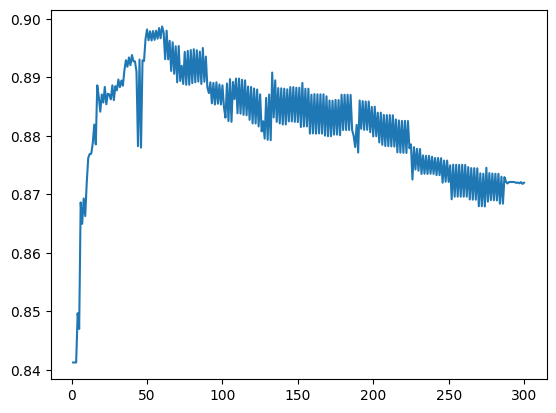

In [6]:
plt_x=[]
plt_y=[]
print(splits)

# print(set(splits[i][0] for i in range(300)))
print(X_test.shape)
best_tree_split=[]
corrects=[0,]*300
classes={1:0,-1:0}
totals={1:0,-1:0}
for i in range(len(y_test)):
  g=0
  for j in range(300):
    dim,cut,p,q,alpha=splits[j]

    if(X_test[i][dim]<=cut):
      g+=alpha*p
    else:
      g+=alpha*q
    pred=np.sign(g)
    if pred==y_test[i]:
      corrects[j]+=1
      if j==60:
        classes[y_test[i]]+=1
    if j==60:
      totals[y_test[i]]+=1
plt_y=[corrects[i]/len(y_test) for i in range(300) ]
plt_x=[i+1 for i in range(300)]

max_accu=0
max_idx=-1
for i in range(len(plt_y)):
  if max_accu<plt_y[i]:
    max_idx=i
    max_accu=plt_y[i]
print(max_accu,max_idx)
tp=classes[1]
fp=totals[-1]-classes[-1]
fn=totals[1]-classes[1]
tn=classes[-1]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("Precision:",precision*100,"%")
print("Recall:",recall*100,"%")
print("F1-Score:",100*2*precision*recall/(precision+recall),"%")
print("Accuracy:",100*(tp+tn)/len(y_test),"%")
plt.plot(np.array(plt_x), np.array(plt_y))
plt.show()